In [4]:
%matplotlib inline
import pandas as pd
import numpy as np

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan'] #list of strings

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students)) #np array
english_grades = np.random.randint(low=60, high=100, size=len(students)) #np array
reading_grades = np.random.randint(low=60, high=100, size=len(students)) #np array

df = pd.DataFrame({'name': students, #list of strings for students becomes the names in the 'name' column
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))}) #dictionary

                    #datatype is a dictionary (a labeled list)
    
    #keys of dict become column names
    #values become whatever input you write

In [5]:
#what does each row/observation represent? 
# *represents an individual student record of their grades
df

,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A
3,Billy,98,96,88,B
4,Ada,77,92,98,A
5,John,79,76,93,B
6,Thomas,82,64,81,A
7,Marie,93,63,90,A
8,Albert,92,62,87,A
9,Richard,69,80,94,A


## When looking at our data
Always ask, what does each row/observation represent?

## Handy Pandas Functions for Reading Data
- `pd.read_csv("filename.csv")`
- `pd.read_excel("filename.xlsx")`
- `pd.read_json("filename.json")`
- `pd.read_sql`
    - uses a syntactically correct SQL query and a connection object
- `pd.read_table`
    - can read an HTML table of content
- `pd.read_clipboard()`
    - can read your clipboard into a dataframe
    - Ex: copy something like a table and run pd.read_clipboard and it'll populate the table you copied

In [7]:
#example, copied a table from DS curriculum
pd.read_clipboard()

,a,b,c
0,1,2,3
1,4,5,6


## From SQL

- Create or update your `.gitignore` to have a line for `env.py`.

- Create a file called `env.py` and add your host, user, and password that you use to connect to MySQL 

- Those 3 variables are strings.

- Make a little notebook or script that has a query, a connection string, and you can make a dataframe out of a query.

In [10]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [11]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [12]:
import pandas as pd
from env import host, user, password
# Connection string
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
query = """
    SELECT * FROM employees limit 10
"""
pd.read_sql(query, url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [13]:
# recommend 3 quotation marks:
sql = '''
SELECT
    emp_no,
    first_name,
    last_name
FROM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200
'''

pd.read_sql(sql, url)

,emp_no,first_name,last_name
0,10513,Yuichiro,Schicker
1,10519,Yonghoan,Alencar
2,10522,Marke,Cesareni
3,10524,Shigehiro,Cincotta
4,10526,Kwangho,Theuretzbacher


## Aggregation
- aggregation and grouping by allow us to put stuff together
- can consider many things, one thing (put stuff together
- changes our dimension of obs
- literally changes what each row in a df means

In [15]:
df.head()


,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A
3,Billy,98,96,88,B
4,Ada,77,92,98,A


In [16]:
#double brackets means a dataframe
# we get a dataframe w/ readin, eng, math, and lose a level of detail
# we lose names and classrooms
# aggregating changes what each row means
df[['english', 'reading', 'math']].agg(['mean', 'min', 'max'])
                                #.agg gives you the rows and outputs the agg function
    

,english,reading,math
mean,77.666667,86.5,84.833333
min,62.000000,67.0,62.000000
max,99.000000,98.0,98.000000


In [17]:
#can add median
df[['english', 'reading', 'math']].agg(['mean', 'min','median', 'max'])
                                    #takes a list of numbers and gives you 1 # back

,english,reading,math
mean,77.666667,86.5,84.833333
min,62.000000,67.0,62.000000
median,77.500000,89.0,90.000000
max,99.000000,98.0,98.000000


In [18]:
#you can also just go one by one
#show english average
df.english.mean()

77.66666666666667

In [19]:
#show median math grade
df.math.median()

90.0

In [20]:
df[['english', 'reading', 'math']].agg(['mean', 'min','median', 'max', 'count'])


,english,reading,math
mean,77.666667,86.5,84.833333
min,62.000000,67.0,62.000000
median,77.500000,89.0,90.000000
max,99.000000,98.0,98.000000
count,12.000000,12.0,12.000000


In [22]:
# grouping by means we're grouping our original rows together by some col's value
df.head()

#each row is an individual name
#grades are continuous
#grouping by classroom makes sense because there are alot of duplicates

,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A
3,Billy,98,96,88,B
4,Ada,77,92,98,A


In [23]:
df.groupby("classroom")

In [24]:
#stp 1: group by a column
#stp 2: need an aggregate function
# take stock of how we're changing our observation/rows from a single student 
    #to a group of rows by classroom letter
df.groupby("classroom").math.min()

classroom
A    62
B    79
Name: math, dtype: int64

In [25]:
#average math score by classroom
df.groupby("classroom").math.mean()

classroom
A    82.625
B    89.250
Name: math, dtype: float64

In [26]:
#grouping by creates a "group by object"
df.groupby("classroom").math.agg(['mean', 'median'])

,mean,median
classroom,,
A,82.625,87
B,89.250,90


In [27]:
#how many names/ppl in class?
#think of the SQL that might correspond to this:
# select classroom, count
# from students
# group by classroom
df.groupby("classroom").name.count()

classroom
A    8
B    4
Name: name, dtype: int64

## Takeaways:
- whatever col/value we "group by" becomes the new obs level
- if the original rows were students, each obs is a student
- when we group by the classroom, each row/obs is a classroom

In [29]:
df.groupby("classroom").describe()
#gives us agg func for math, english, reading

math                                                    english  \
          count    mean        std   min    25%   50%    75%   max   count   
classroom                                                                    
A           8.0  82.625  12.281665  62.0  75.00  87.0  92.25  94.0     8.0   
B           4.0  89.250   7.973916  79.0  85.75  90.0  93.50  98.0     4.0   

                  ...              reading                                  \
            mean  ...    75%   max   count    mean        std   min    25%   
classroom         ...                                                        
A          72.75  ...  81.25  92.0     8.0  87.125   8.887190  72.0  80.75   
B          87.50  ...  96.75  99.0     4.0  85.250  12.392874  67.0  82.75   

                              
            50%    75%   max  
classroom                     
A          88.5  94.25  98.0  
B          90.5  93.00  93.0  

[2 rows x 24 columns]

In [31]:
#possible to group by multiple columns
#make a passing_math col:
df["passing_math"] = df.math >= 70
df.head()

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,False
1,Jane,88,79,67,B,True
2,Suzie,94,74,95,A,True
3,Billy,98,96,88,B,True
4,Ada,77,92,98,A,True


In [33]:
df.groupby(["classroom", "passing_math"]).reading.agg(["mean", "median", "min", "max"])
#class A has students that are failing and passing math
#class B has all passing math, but the min in reading is 67 so somebody in reading is failing reading

#median, min, and max are for reading
#passing_math is just students failing or passing math

mean  median  min  max
classroom passing_math                             
A         False         87.000000    87.0   80   94
          True          87.166667    88.5   72   98
B         True          85.250000    90.5   67   93

In [34]:
df.groupby(['classroom', 'passing_math']).name.count()

classroom  passing_math
A          False           2
           True            6
B          True            4
Name: name, dtype: int64

In [35]:
df.groupby(['classroom', 'passing_math']).math.agg(['count', 'mean'])

count       mean
classroom passing_math                  
A         False             2  65.500000
          True              6  88.333333
B         True              4  89.250000

In [36]:
df.assign(avg_math_score_by_classroom=df.groupby('classroom').math.transform('mean'))

# making a new col called avg_math_score_by_classroom

#.transform allows us to calc an aggregate & append that agg onto original df

,name,math,english,reading,classroom,passing_math,avg_math_score_by_classroom
0,Sally,62,85,80,A,False,82.625
1,Jane,88,79,67,B,True,89.250
2,Suzie,94,74,95,A,True,82.625
3,Billy,98,96,88,B,True,89.250
4,Ada,77,92,98,A,True,82.625
5,John,79,76,93,B,True,89.250
6,Thomas,82,64,81,A,True,82.625
7,Marie,93,63,90,A,True,82.625
8,Albert,92,62,87,A,True,82.625
9,Richard,69,80,94,A,False,82.625


In [37]:
# Aggregation example:
# count the num of employees in each dept from employees_db
# in SQL: select dept_name, count(*)
        # from departments
        # join dept_emp using (dept_no)
        # where to_date > now()
        # group by dept_name
        
#replicate 

sql = """
select *
from departments
join dept_emp using (dept_no)
where to_date > now()
"""

employees = pd.read_sql(sql, url)
employees.head()

,dept_no,dept_name,emp_no,from_date,to_date
0,d009,Customer Service,10038,1989-09-20,9999-01-01
1,d009,Customer Service,10049,1992-05-04,9999-01-01
2,d009,Customer Service,10060,1992-11-11,9999-01-01
3,d009,Customer Service,10088,1992-03-21,9999-01-01
4,d009,Customer Service,10112,1998-05-01,9999-01-01


In [38]:
employees.groupby("dept_name").emp_no.count()

#each row represents a department with an employee count

dept_name
Customer Service      17569
Development           61386
Finance               12437
Human Resources       12898
Marketing             14842
Production            53304
Quality Management    14546
Research              15441
Sales                 37701
Name: emp_no, dtype: int64

In [39]:
# get min, mean, median, and max salary numbers by gender
sql = """
select * 
from employees
join salaries using (emp_no)
where to_date > now();
"""

employees = pd.read_sql(sql, url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [41]:
    #groupby column we want and get agg functions from salary #s
employees.groupby("gender").salary.agg(["min", "mean", "median", "max", "count"])

,min,mean,median,max,count
gender,,,,,
F,38936,71963.570753,69764,152710,96010
M,38623,72044.656973,69830,158220,144114


In [49]:
#do the same as above, but group by dept_name AND gender
sql = """
select *
from employees
join salaries using (emp_no)
join dept_emp using (emp_no)
join departments using (dept_no)
where dept_emp.to_date > now() and salaries.to_date > now();
"""

employees = pd.read_sql(sql, url)
employees.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,64254,2001-09-17,9999-01-01,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,51326,2002-05-02,9999-01-01,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,93188,2002-05-25,9999-01-01,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,98003,2001-08-30,9999-01-01,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,61070,2002-04-30,9999-01-01,1998-05-01,9999-01-01,Customer Service


In [50]:
employees.groupby(["dept_name", "gender"]).salary.agg(["min", "mean", "median", "max", "count"])

min          mean   median     max  count
dept_name          gender                                             
Customer Service   F       39812  67409.493935  65198.0  144866   7007
                   M       39373  67202.791611  65100.0  143950  10562
Development        F       39469  67575.845881  66355.0  144434  24533
                   M       39036  67712.555911  66526.0  140784  36853
Finance            F       39949  78747.416633  78285.0  136978   5014
                   M       39012  78433.300418  77526.0  142395   7423
Human Resources    F       38936  64139.954731  62782.0  123268   5147
                   M       39611  63777.101922  62864.0  141953   7751
Marketing          F       39871  79699.771487  78595.5  141842   5864
                   M       39821  80293.380931  79481.0  145128   8978
Production         F       39476  67728.112560  66645.0  138273  21393
                   M       38623  67920.524490  66768.0  132552  31911
Quality Management F       39571  65561.837704  64685.0  122965   5872
                   M       38942  65360.862924  64258.0  132103   8674
Research           F       39526  68011.855201  66814.0  124158   6181
                   M       39186  67847.639957  66576.5  130211   9260
Sales              F       40392  88835.963931  88581.0  152710  14999
                   M       39426  88864.204872  88461.5  158220  22702

In [51]:
#can swap 
employees.groupby(["gender", "dept_name"]).salary.agg(["min", "mean", "median", "max", "count"])

min          mean   median     max  count
gender dept_name                                                      
F      Customer Service    39812  67409.493935  65198.0  144866   7007
       Development         39469  67575.845881  66355.0  144434  24533
       Finance             39949  78747.416633  78285.0  136978   5014
       Human Resources     38936  64139.954731  62782.0  123268   5147
       Marketing           39871  79699.771487  78595.5  141842   5864
       Production          39476  67728.112560  66645.0  138273  21393
       Quality Management  39571  65561.837704  64685.0  122965   5872
       Research            39526  68011.855201  66814.0  124158   6181
       Sales               40392  88835.963931  88581.0  152710  14999
M      Customer Service    39373  67202.791611  65100.0  143950  10562
       Development         39036  67712.555911  66526.0  140784  36853
       Finance             39012  78433.300418  77526.0  142395   7423
       Human Resources     39611  63777.101922  62864.0  141953   7751
       Marketing           39821  80293.380931  79481.0  145128   8978
       Production          38623  67920.524490  66768.0  132552  31911
       Quality Management  38942  65360.862924  64258.0  132103   8674
       Research            39186  67847.639957  66576.5  130211   9260
       Sales               39426  88864.204872  88461.5  158220  22702

In [52]:
#crosstab employees example
pd.crosstab(employees.dept_name, employees.gender)

gender,F,M
dept_name,,
Customer Service,7007,10562
Development,24533,36853
Finance,5014,7423
Human Resources,5147,7751
Marketing,5864,8978
Production,21393,31911
Quality Management,5872,8674
Research,6181,9260
Sales,14999,22702


In [53]:
pd.crosstab(employees.gender, employees.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,7007,24533,5014,5147,5864,21393,5872,6181,14999
M,10562,36853,7423,7751,8978,31911,8674,9260,22702


In [64]:
#crosstab and .pivot table
pd.crosstab(df.passing_math, df.classroom)

#pd.crosstab counts the # of occurances of each subroup(each unique comb)

classroom,A,B
passing_math,,
False,2,0
True,6,4


In [54]:
#crosstab fun lets us know percentage w/ normalize=True
pd.crosstab(employees.dept_name, employees.gender, normalize = True)

gender,F,M
dept_name,,
Customer Service,0.029181,0.043986
Development,0.102168,0.153475
Finance,0.020881,0.030913
Human Resources,0.021435,0.032279
Marketing,0.024421,0.037389
Production,0.089091,0.132894
Quality Management,0.024454,0.036123
Research,0.025741,0.038563
Sales,0.062464,0.094543


In [55]:
# view subtotals with margins=True
pd.crosstab(employees.dept_name, employees.gender, margins = True)

gender,F,M,All
dept_name,,,
Customer Service,7007,10562,17569
Development,24533,36853,61386
Finance,5014,7423,12437
Human Resources,5147,7751,12898
Marketing,5864,8978,14842
Production,21393,31911,53304
Quality Management,5872,8674,14546
Research,6181,9260,15441
Sales,14999,22702,37701


In [66]:
#pd.concat: to combine dataframes vertically (like CONCAT() in SQL)
df1 = pd.DataFrame({'a': [1, 2, 3]})
df2 = pd.DataFrame({'a': [4, 5, 6]})

pd.concat([df1, df2])

#note: the indices are preserved on the resulting dataframe, we could call the reset_index method if we wanted these to be sequential.

,a
0,1
1,2
2,3
0,4
1,5
2,6


In [71]:
#pivot_table to calc avg math grade for comb of classroom & whether each student is passing/failing math

df.pivot_table(values='math', index='classroom', columns='passing_math', aggfunc='mean')

#.pivot_table creates our summary. Must supply:
    # values we are aggregating
    # which values will make up the rows (index)
    # an aggreg method(aggfunc); if omitted, mean will be default
    
    
#Also note: we can supply a list of column names for values, index and col

passing_math,False,True
classroom,,
A,95.89855,129.328833
B,NaN,130.670925


In [67]:
#pd.merge: to combine dataframes horizontally(like SQL JOIN)
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [68]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [69]:
# merge func will accept the left & right dataframes, and two keyword arguments:
 # 'left_on', and 'right_on' that are used to indicate the col that are keys that will be used to merge the dataframes together.
#the 'how' keyword argument is used to define what type of JOIN we want to do; 
# one of inner, left, right, or outer.

pd.merge(users, roles, left_on='role_id', right_on='id', how='left')


,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [70]:
# Note we have duplicate col names in the resulting dataframe. 
#By default, pandas will add a suffix of _x to any cols in the left df that are duplicated,
# and _y to any cols in the right df that are duplicated. 
# We can customize this behavior with the suffixes keyword argument, 
# or we can simply rename the columns before the merge:

pd.merge(
    users.rename(columns={'id': 'user_id', 'name': 'username'}),
    roles.rename(columns={'name': 'role_name'}),
    left_on='role_id', right_on='id', how='left')

,user_id,username,role_id,id,role_name
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [72]:
#another ex:
n = 40

orders = pd.DataFrame({
    'drink': np.random.choice(['Tea', 'Water', 'Water'], n),
    'meal': np.random.choice(['Curry', 'Yakisoba Noodle', 'Pad Thai'], n),
})

prices = {
    'Yakisoba Noodle': 9,
    'Curry': 11,
    'Pad Thai': 10,
    'Tea': 2,
    'Water': 0,
}

# The .map method lets us use the above dictionary to calculate the total price for an order
orders['bill'] = orders.drink.map(prices) + orders.meal.map(prices)

orders.tail(5)

,drink,meal,bill
35,Water,Curry,11
36,Tea,Curry,13
37,Water,Pad Thai,10
38,Water,Curry,11
39,Water,Pad Thai,10


In [73]:
#how many orders have each comb of meal and drink
pd.crosstab(orders.drink, orders.meal)


meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,3,4,5
Water,9,10,9


In [74]:
pd.crosstab(orders.drink, orders.meal, normalize=True, margins=True)


meal,Curry,Pad Thai,Yakisoba Noodle,All
drink,,,,
Tea,0.075,0.10,0.125,0.3
Water,0.225,0.25,0.225,0.7
All,0.300,0.35,0.350,1.0


In [75]:
#find out the bill amount for each comb
orders.pivot_table('bill', 'drink', 'meal')


meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,13,12,11
Water,11,10,9


In [76]:
#can get same info w/ multi-level group by
orders.groupby(['drink', 'meal']).bill.mean()


drink  meal           
Tea    Curry              13
       Pad Thai           12
       Yakisoba Noodle    11
Water  Curry              11
       Pad Thai           10
       Yakisoba Noodle     9
Name: bill, dtype: int64

<AxesSubplot:ylabel='Frequency'>

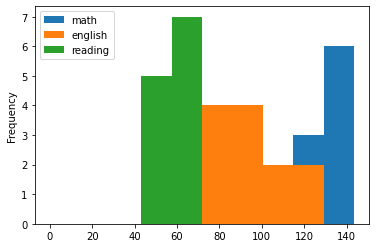

In [77]:
#a dataframe's *index* is a way to label each row:
df.set_index('classroom').plot.hist()


In [78]:
#.pipe allows chains of func that accept & return dataframes
#to be applied to a dataframe, & extra arguments to those funcs to be specified
def calculate_avg_grade(df):
    avg = (df.math + df.english + df.reading) / 3
    return df.assign(average_grade=avg)

df.pipe(calculate_avg_grade)

,name,math,english,reading,classroom,passing_math,average_grade
0,Sally,90.7742,105,52.4880,A,False,82.754067
1,Jane,128.8408,99,43.9587,B,True,90.599833
2,Suzie,137.6254,94,62.3295,A,True,97.984967
3,Billy,143.4818,116,57.7368,B,True,105.739533
4,Ada,112.7357,112,64.2978,A,True,96.344500
5,John,115.6639,96,61.0173,B,True,90.893733
6,Thomas,120.0562,84,53.1441,A,True,85.733433
7,Marie,136.1613,83,59.0490,A,True,92.736767
8,Albert,134.6972,82,57.0807,A,True,91.259300
9,Richard,101.0229,100,61.6734,A,False,87.565433


In [56]:
#.pipe ex
def nudge_grades(df):
    #cranks up the math score by 10%
    #cranks down the reading by 10%
    df.math = df.math + df.math * .10
    df.reading = df.reading - df.reading * .10
    return df

In [57]:
def bump_english(df):
    df.english = df.english + 5
    return df

In [58]:
nudge_grades(df)

,name,math,english,reading,classroom,passing_math
0,Sally,68.2,85,72.0,A,False
1,Jane,96.8,79,60.3,B,True
2,Suzie,103.4,74,85.5,A,True
3,Billy,107.8,96,79.2,B,True
4,Ada,84.7,92,88.2,A,True
5,John,86.9,76,83.7,B,True
6,Thomas,90.2,64,72.9,A,True
7,Marie,102.3,63,81.0,A,True
8,Albert,101.2,62,78.3,A,True
9,Richard,75.9,80,84.6,A,False


In [59]:
bump_english(df)

,name,math,english,reading,classroom,passing_math
0,Sally,68.2,90,72.0,A,False
1,Jane,96.8,84,60.3,B,True
2,Suzie,103.4,79,85.5,A,True
3,Billy,107.8,101,79.2,B,True
4,Ada,84.7,97,88.2,A,True
5,John,86.9,81,83.7,B,True
6,Thomas,90.2,69,72.9,A,True
7,Marie,102.3,68,81.0,A,True
8,Albert,101.2,67,78.3,A,True
9,Richard,75.9,85,84.6,A,False


In [60]:
#with nested func calls like this, the order of ops is from the inside to outside
#kinda feels like reading from right to left
bump_english(nudge_grades(df))

,name,math,english,reading,classroom,passing_math
0,Sally,75.02,95,64.80,A,False
1,Jane,106.48,89,54.27,B,True
2,Suzie,113.74,84,76.95,A,True
3,Billy,118.58,106,71.28,B,True
4,Ada,93.17,102,79.38,A,True
5,John,95.59,86,75.33,B,True
6,Thomas,99.22,74,65.61,A,True
7,Marie,112.53,73,72.90,A,True
8,Albert,111.32,72,70.47,A,True
9,Richard,83.49,90,76.14,A,False


In [62]:
#.pipe exists to take in func def and chain/read from left to right
# .pipe allows reading and order of application
df.pipe(nudge_grades).pipe(bump_english)

#note: every time you run it, the grades keep changing due to running the custom defined func

,name,math,english,reading,classroom,passing_math
0,Sally,90.7742,105,52.4880,A,False
1,Jane,128.8408,99,43.9587,B,True
2,Suzie,137.6254,94,62.3295,A,True
3,Billy,143.4818,116,57.7368,B,True
4,Ada,112.7357,112,64.2978,A,True
5,John,115.6639,96,61.0173,B,True
6,Thomas,120.0562,84,53.1441,A,True
7,Marie,136.1613,83,59.0490,A,True
8,Albert,134.6972,82,57.0807,A,True
9,Richard,101.0229,100,61.6734,A,False


In [63]:
employees.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,64254,2001-09-17,9999-01-01,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,51326,2002-05-02,9999-01-01,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,93188,2002-05-25,9999-01-01,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,98003,2001-08-30,9999-01-01,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,61070,2002-04-30,9999-01-01,1998-05-01,9999-01-01,Customer Service


In [65]:
# .loc[starting_row:ending_row, starting_column:ending_column]
employees.loc[0:3, 'birth_date':'salary']

#from birthdate up to and including salary

,birth_date,first_name,last_name,gender,hire_date,salary
0,1960-07-20,Huan,Lortz,M,1989-09-20,64254
1,1961-04-24,Basil,Tramer,F,1992-05-04,51326
2,1961-10-15,Breannda,Billingsley,M,1987-11-02,93188
3,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,98003


In [82]:
df.head()

,name,math,english,reading,classroom,passing_math
0,Sally,90.7742,105,52.4880,A,False
1,Jane,128.8408,99,43.9587,B,True
2,Suzie,137.6254,94,62.3295,A,True
3,Billy,143.4818,116,57.7368,B,True
4,Ada,112.7357,112,64.2978,A,True


In [79]:
#.iloc subsets rows or cols using numerical index:
#ex: first 3 rows
df.iloc[:3]

,name,math,english,reading,classroom,passing_math
0,Sally,90.7742,105,52.4880,A,False
1,Jane,128.8408,99,43.9587,B,True
2,Suzie,137.6254,94,62.3295,A,True


In [80]:
#can also specify which cols we want:
df.iloc[:3, 1:3]

#.iloc[start_row:end_row, start_col:end_col]
#for row: up to and excluding index 3 (since we start our index at 0)
#for col: start at math ([1]) and excluding reading [3] 

,math,english
0,90.7742,105
1,128.8408,99
2,137.6254,94


In [83]:
#Transposing
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
name,Sally,Jane,Suzie,Billy,Ada,John,Thomas,Marie,Albert,Richard,Isaac,Alan
math,90.7742,128.841,137.625,143.482,112.736,115.664,120.056,136.161,134.697,101.023,134.697,134.697
english,105,99,94,116,112,96,84,83,82,100,119,82
reading,52.488,43.9587,62.3295,57.7368,64.2978,61.0173,53.1441,59.049,57.0807,61.6734,61.0173,47.2392
classroom,A,B,A,B,A,B,A,A,A,A,B,A
passing_math,False,True,True,True,True,True,True,True,True,False,True,True
